# Table of contents:

* [First Music Chart](#round3) 
* [Second Music Chart](#round4)
* [Baddies](#round5)
* [Music Lab Continues](#round6)
* [Playlists](#round7)
* [Audio Features](#round8)
* [Clustering](#round9)
* [Recommender9000](#round10)


In [40]:
# !jt -t onedork
!jt -t onedork -tf hack -f fira -fs 95 -tfs 11 -nfs 115 -cellw 95%
# !jt -t grade3 -altp

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import random
# pd.set_option("display.max_rows", None) # show every row in dataframe

# First Music Chart 
<a class="anchor" id="round3"></a>

In [ ]:
## first music website

In [ ]:
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [ ]:
response = requests.get(url)
response.status_code # 200 status code means OK!

In [ ]:
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
# song_title = []
# for i in soup.select('p.title-artist cite'):
#     song_title.append(i.get_text())
    
# artist = []
# for i in soup.select('p.title-artist em'):
#     artist.append(i.get_text())   

In [ ]:
#
# soup.select('p.title-artist')
# soup.select('p.title-artist cite')

song_title = []
artist = []

num_iter = len(soup.select('p.title-artist'))

song_list = soup.select("p.title-artist cite")
artist_list = soup.select("p.title-artist em")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    artist.append(artist_list[i].get_text())
    song_title.append(song_list[i].get_text())
 

In [ ]:
# trying for genre
# # soup.select('ul a')
# for i in soup.select('li'):
#     print(i.get_text())
# useless now, some genre are not an 'a' anchor
# ---> slicing it up is now the better option, like I did it with the second music chart

# genre = soup.select('li')
# genre_list = []
# for i in genre:
#     if (('Pop' in i) or
#         ('Country' in i) or
#         ('Soundtrack'in i) or
#         ('Hip-Hop / Rap'in i) or
#         ('New Release'in i) or
#         ('Rock'in i) or
#         ('Hard Rock'in i) or
#         ('R&B / Soul'in i) or
#         ('CCM'in i) or
#         ('Comedy'in i) or
#         ('K-Pop'in i) or
#         ('Dance'in i) or
#         ('Latin'in i) or
#         ('Billboard Hot 100'in i) or
#         ('Heavy Metal'in i) or
#         ('Alternative'in i)):
        
#         genre_list.append(i.get_text())
# genre_list

In [ ]:
# display(song_title)
# display(artist)
len(artist)

In [ ]:
# Nice! 
# Top 100 garbage music around the world
list_all = pd.DataFrame({'artist':artist,'title':song_title})
list_all.head()

# Second Music Chart <a class="anchor" id="round4"></a>

In [ ]:
## second music website

In [ ]:
url = "https://www.top-charts.com/songs/all-genres/germany/total"
response = requests.get(url)
print(response.status_code) # 200 status code means OK!
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
## finding the needle in a haystack
# soup.find_all('span')
# soup.select('span')[100].get_text()

In [ ]:
# trying to get release date, no luck so far
# test = []
# for date in soup.select('span'):
# #     if re.match('Release Date',soup.select('span')) in date:
#         test.append(date.get_text())
# re.fullmatch('Release Date',test)
# # /[Release Date]*\w/gm
# # re.findall(pattern, text)

In [ ]:
titles = soup.select('div.text-truncate')
all_tits = []
for name in titles[0:len(titles)-2:2]:
    all_tits.append(name.get_text())
#     print(name)
# len(all_tits)
# all_tits

In [ ]:
# titles = soup.select('div.text-truncate')
all_names = []
for name in titles[1:len(titles)-2:2]:
    all_names.append(name.get_text())
#     print(name)
# len(all_names)
# all_names

In [ ]:
# Great!
# all the garbage music germans like to hear

list_all_ger = pd.DataFrame({'artist':all_names,'title':all_tits})
list_all_ger.head()

# Baddies <a class="anchor" id="round5"></a>

In [ ]:
## europe's baddest baddies
url = "https://eumostwanted.eu"
response = requests.get(url)
print(response.status_code) # 200 status code means OK!
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
# soup.select('a')

In [ ]:
# baddie names
baddies = []
for i in soup.select('a'):
    baddies.append(i.get_text())
baddies = baddies[14:61]
baddies = pd.DataFrame({'Name':baddies})

baddies[['Last','First']] = baddies.Name.str.split(',',expand=True)
baddies = baddies.drop(['Name'],axis=1)

baddies.at[29,'Last']='van Khoa DO' 
baddies.at[29,'First']='Steffen'
# print(len(baddies)) # 14, 64-3 for slicing
# display(baddies)
baddies.head()

# Music Lab Continues <a class="anchor" id="round6"></a>

In [ ]:
####################################
   ### music lab continues....###
####################################

In [ ]:
# first music chart
print(list_all.head(3))
# second music chart
print(list_all_ger.head(3))

In [ ]:
# total world lower casing
# first chart
for value in list_all:
    list_all[value] = list_all[value].str.lower()
print(list_all.head(3))

# second chart
for value in list_all_ger:
    list_all_ger[value] = list_all_ger[value].str.lower()
print(list_all_ger.head(3))

In [ ]:
# artist splitting not necessary right now
# list_all_ger_split[['artist_1','artist_2','artist_3','artist_4']] = list_all_ger.artist.str.split(',',expand=True)
# list_all_ger = list_all_ger.drop(['artist'],axis=1)
# list_all_ger_split = list_all_ger
# list_all_ger_split.head(3)

In [ ]:
## converting columns to list
### first music chart
sonli_1 = list_all.title.tolist()
### second music chart
sonli_2 = list_all_ger.title.tolist()

In [ ]:
# sonli_1

In [ ]:
# artist missing

input_song = input('Name a song: ').lower() # user input is converted to lower case
matches = [match for match in sonli_1 if input_song in match]
if len(matches)>=1: # list length = 0 = no match in matches
    print('{} is so hawt right now!'.format(matches[0].title())) # prints only the first match
    print('Try another song: ' + random.choice(list_all.title).title())
else:
    print('No....just no...''\n''Nothing to recommend. Bye!')  # matches[0] -> without [0] this happens

# Playlists <a class="anchor" id="round7"></a>

In [ ]:
# playlist mit name, titel, audio features

In [23]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep

# spotify login
secrets_file = open("spotify_dev.txt","r")
string = secrets_file.read()

secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip() # 0 = key, 1 = value, '=' = key-value-pair

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [ ]:
playlist = sp.user_playlist_tracks("spotify", "4TDhkzn4D3LDs88BnQ8QZ3")

In [ ]:
len(playlist)

In [21]:
#############################
   #  fetching playlists #
#############################
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,5)) # respectful requesting
    return tracks

In [24]:
pl_1 = get_playlist_tracks("4TDhkzn4D3LDs88BnQ8QZ3") # melodic techno mega playlist
len(pl_1)

1079

In [ ]:
pl_1 = get_playlist_tracks("4TDhkzn4D3LDs88BnQ8QZ3") # melodic techno mega playlist
len(pl_1) # 1079

pl_2 = get_playlist_tracks("3Iwd2RiXCzmm1AMUpRAaHO") # video game soundstracks + 2700 osts
len(pl_2) # 3086

pl_3 = get_playlist_tracks("5SV1MzLveQNBd9RxfM3cab") # oldschool schlager/party
len(pl_3) # 71

pl_4 = get_playlist_tracks("6zfOVd4uZHkLjenFDnfW21") # alte schlager 60/70/80
len(pl_4) #  132

pl_5 = get_playlist_tracks("6Eja0ovo6QQDIS9XyW01Wj") # heavymetal - power metal - best of metal party
len(pl_5) # 521

pl_6 = get_playlist_tracks("5c8v98YQQ4WuWu1JqoadqY") # heavymetal - megamix
len(pl_6) # 1503

pl_7 = get_playlist_tracks("6y305NpaXU4o5b4jnm9sTl") # jedi master playlist
len(pl_7) # 2583

pl_8 = get_playlist_tracks("37i9dQZF1DWVr03NrIUlx5") # 8 bit hits
len(pl_8) # 100

pl_9 = get_playlist_tracks("0CDOZ5n6bCIKlSJUtxGZsa") # mega playlist
len(pl_8) # 2300

pl_10 = get_playlist_tracks("37i9dQZF1DZ06evO4ebTWg") # this modern talking
len(pl_10) # 50

pl_11 = get_playlist_tracks("2L2HwKRvUgBv1YetudaRI3") # pop 2000-2010
len(pl_11) # 334

pl_12 = get_playlist_tracks("6EpZtwVXxs3hUmqL1QBh6Y") # saddest of sad
len(pl_12) # 1705

pl_13 = get_playlist_tracks("3bbTvjXUt0NbULwvBD6UgY") # aggressive workout/motivational workout
len(pl_13) # 219

pl_14 = get_playlist_tracks("37i9dQZF1DWWQRwui0ExPn") # lofi beats
len(pl_14) # 999

pl_15 = get_playlist_tracks("5hRGglTwwSAhw5TXXkeOHQ") # hard techno - rave or grave
len(pl_15) # 592

pl_16 = get_playlist_tracks("0SLyKmX5AcZmNLAWlhqong") # hardbass & techno
len(pl_16) # 516

pl_17 = get_playlist_tracks("5mupNfcYsGXYwd7e0IcHte") # 90s underground techno
len(pl_17) # 510

pl_18 = get_playlist_tracks("3kpzURw4wImwjy2KSCEaI3") # hardstyle 3150+ songs / megaplaylist
len(pl_18) # 3229

pl_19 = get_playlist_tracks("05wKlNENUxHPbEkmFlIoyG") # hardstyle 3150+ songs / megaplaylist
len(pl_19) # 371

pl_20 = get_playlist_tracks("3vzkP2ItgMpmiXHmfF5fCF") # psychodelic sex
len(pl_20) # 56

pl_21 = get_playlist_tracks("0IkHxVGfbVPQvx8Ms3zHF1") # african drums
len(pl_21) # 84

In [ ]:
pl_ultra = pl_1 + pl_2 + pl_3 + pl_4 + pl_5 + pl_6 + pl_7 + pl_8 + pl_9 + pl_10 + pl_11 + pl_12 + pl_13 + pl_14 + pl_15 + pl_16 + pl_17 + pl_18 + pl_19 + pl_20
len(pl_ultra)

In [ ]:
# total number of songs = 23090

In [ ]:
#########################
   ### song titles ###
#########################

In [ ]:
from pandas import json_normalize

In [ ]:
# code for testing, etc. ###
###############################

# flattened_data = json_normalize(flatten(data))
# flattened_data

# def flatten(input_list):
#     return [item for sublist in input_list for item in sublist]

# matches = [match for match in sonli_1 if input_song in match]

In [ ]:
# pl_9
# pl_9[0].keys()

In [ ]:
# flattened_data = json_normalize(pl_1[0]['track']['artists'])
# flattened_data['name']

In [ ]:
# pl_9[0]['track']['artists'][0]['name']

In [ ]:
title = []
for list_el in pl_ultra:
    try:
       title.append(list_el['track']['name']) 
    except:
        title.append('None')

In [ ]:
len(title)

In [ ]:
###########################
   ### artist names ###
###########################

In [583]:
flattened_data = json_normalize(pl_1[0]['track'])
flattened_data.artists[0][2]['name']

'delline bass'

In [ ]:
# test = []
# for col in flattened_data:
#     try:
#        test.append(col['id'])
#     except:
#         continue

In [ ]:
# test

In [340]:
artist = []
for list_el in pl_1:
    try:
       artist.append(list_el['track']['artists'][0]['name'])
    except:
        artist.append('None')

In [342]:
# artist

In [ ]:
# for i, j in zip(sp.search(input_song, limit=10,type='track')['tracks']['items'],
#                sp.search(input_song, limit=10,type='track')['tracks']['items']):
#     print(i['artists'][0]['name'],j['name'])

In [ ]:
# artist_name = []
# for i in range(len(pl_1)):
#      try:
#         artist = pl_1[i]["track"]["album"]['artists'][0]['name']
#         artist_name.append(artist)
#      except:
#         artist_name.append('none')

In [ ]:
artist_name = []

In [ ]:
len(artist) # only 1 artist

In [383]:
# art_all = []
# for list_el in pl_1:    
#     try:
#         for art in list_el['track']['artists']:
#             try:
#                 art_all.append((art['name']))
               
#             except:
#                 continue
#     except:
#         continue

In [552]:
# art_all

In [35]:
# #THIS FUNCTION WILL BE USED AGAIN!
# def get_name_artists_from_track(track):
#     return [(track["name"],artist["name"]) for artist in track["artists"]]

# #flattening is not in the standard library but used a lot. you'll thank me later
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

# # Kombi der oberen Fkt.
# def get_name_artists_from_list(tracks):
#     return flatten(list(map(get_name_artists_from_track,tracks['items']))) # tracks = result

# #first we need to get a list of individual tracks from the playlist
# def get_name_artist_from_playlist_item(playlist_item):
#     return get_name_artists_from_track(playlist_item['track']) # track = items

# def get_name_artists_from_playlist(input_playlist):
#     return list(map(get_name_artist_from_playlist_item,input_playlist["items"]))

# def get_name_artists_from_playlist(input_playlist):
#     return flatten(list(map(get_name_artist_from_playlist_item,input_playlist["items"])))

In [130]:
to = []
for i in pl_1: 
    for artist in i['track']['artists']:
       to.append((i['track']['name'],artist['name']))

In [137]:
to.str.split(',')

AttributeError: 'list' object has no attribute 'str'

In [128]:
def artists(x):
    for i in x:
        y = []
        for artist in i['track']['artists']:
           y = (list(i['track']['name'],artist['name']))
    return y#i['track']['name'],artist['name']

In [129]:
to =[]
to.append(artists(pl_1))

TypeError: list expected at most 1 argument, got 2

In [123]:
artists(pl_1)

('Volition', 'Kasablanca')


In [45]:
tt.str.split(',','')

NameError: name 'tt' is not defined

In [ ]:
########################################################
   ### putting song name and artist in dataframe ###
########################################################

pl_mega = pd.DataFrame({'artist':artist,'title':title})
# pl_mega

In [ ]:
# important for later
pl_super = pl_mega[0:][0:23056]

# Audio Features <a class="anchor" id="round8"></a>

In [ ]:
# playlist = sp.user_playlist_tracks("spotify", '0IkHxVGfbVPQvx8Ms3zHF1')
# type(sp.audio_features(playlist["items"][46]["track"]["uri"]))
# pd.DataFrame(sp.audio_features(playlist["items"][46]["track"]["uri"]))
# playlist["items"][46]["track"]["uri"]
# pl_9[0]['track']['uri']
# features(pl_9)

In [ ]:
# WIP
# def features(x):
#     for i in x:
#         try:
# #         print(i)
#             feature_url = i['track']['uri']
#             return sp.audio_features(feature_url)
#         except:
#             continue

In [ ]:
audio_feature = []
cnt=0
for i in pl_ultra:
    try:
        if cnt == 500: # after requesting 500 titles a delay starts to avoid a ban
            print(cnt) # to see the progress
            sleep(randint(1,3)) # delay between 1 - 3 seconds
            cnt = 0
        else:
            cnt +=1
            feature_url = i['track']['uri']
            audio_feature.append(sp.audio_features(feature_url))
        except:
            audio_feature.append('None')

In [ ]:
len(audio_feature)

In [23]:
from pandas import json_normalize
#flattening is not in the standard library but used a lot. you'll thank me later
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [ ]:
data = audio_feature

In [ ]:
print(type(data))
print(len(data))
# data

In [ ]:
# with this double flatten approach I can put all features in a dataframe
# without extracting the features via loops
# -> saves alot of time

flattened_data = (flatten(data))
# flattened_data

In [ ]:
data_1 = pd.DataFrame(flattened_data)

In [ ]:
# data_1

In [ ]:
data_2 = pd.concat([pl_super,data_1],axis=1)

In [ ]:
data_2 = data_2.drop(['type','id','uri','track_href','analysis_url'],axis=1)


In [ ]:
# data_2.to_csv('data_cluster.csv')

In [ ]:
#  data_2

# Clustering <a class="anchor" id="round9"></a>

In [40]:
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [41]:
data_1 = pd.read_csv('data_cluster.csv')

In [42]:
data_1.head(3)

,Unnamed: 0,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Reflekt,Need To Feel Loved - Cristoph Remix,0.716,0.636,3.0,-10.251,0.0,0.0507,0.000898,0.891,0.0978,0.0648,124.994,466560.0,4.0
1,1,Rafael Cerato,She Is Really Fresh - Horisone Remix,0.775,0.682,11.0,-8.841,1.0,0.0386,0.002270,0.903,0.0785,0.3700,124.009,421771.0,4.0
2,2,Rafael Cerato,Rock It,0.803,0.743,11.0,-6.241,1.0,0.0532,0.001200,0.308,0.0618,0.1760,123.006,475173.0,4.0


In [43]:
# X = data_1.drop(['id','uri','track_href','analysis_url','type'],axis=1)
X = data_1.drop(['Unnamed: 0'],axis=1)
# X = data_1.drop(['Unnamed: 0','artist','title'],axis=1)

In [44]:
X.head(3)

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Reflekt,Need To Feel Loved - Cristoph Remix,0.716,0.636,3.0,-10.251,0.0,0.0507,0.000898,0.891,0.0978,0.0648,124.994,466560.0,4.0
1,Rafael Cerato,She Is Really Fresh - Horisone Remix,0.775,0.682,11.0,-8.841,1.0,0.0386,0.002270,0.903,0.0785,0.3700,124.009,421771.0,4.0
2,Rafael Cerato,Rock It,0.803,0.743,11.0,-6.241,1.0,0.0532,0.001200,0.308,0.0618,0.1760,123.006,475173.0,4.0


In [45]:
#drop all rows that have any NaN values
X = X.dropna()

#reset index of DataFrame
X = X.reset_index(drop=True)

# X.isna().sum()

In [46]:
# X_num = X.drop(['artist','title'],axis=1)
# X_cat = X.drop(['loudness','mode','speechiness','acousticness','danceability', 'energy','key',
# 'instrumentalness','liveness','valence','tempo','duration_ms','time_signature'],axis=1)

In [47]:
# X_num
# X_cat

In [48]:
y = X[['artist','title']]

X_feat = X.drop(['artist','title'],axis=1)
X_feat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.716,0.636,3.0,-10.251,0.0,0.0507,0.000898,0.891,0.0978,0.0648,124.994,466560.0,4.0
1,0.775,0.682,11.0,-8.841,1.0,0.0386,0.002270,0.903,0.0785,0.3700,124.009,421771.0,4.0
2,0.803,0.743,11.0,-6.241,1.0,0.0532,0.001200,0.308,0.0618,0.1760,123.006,475173.0,4.0
3,0.740,0.840,2.0,-9.410,1.0,0.0523,0.000635,0.896,0.1130,0.2350,121.996,262014.0,4.0
4,0.788,0.846,1.0,-9.207,1.0,0.0411,0.000216,0.817,0.0940,0.2770,121.986,442623.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,0.604,0.315,2.0,-16.519,1.0,0.0609,0.607000,0.898,0.0902,0.5560,124.687,382293.0,4.0
23034,0.607,0.227,2.0,-20.687,1.0,0.1100,0.952000,0.884,0.2090,0.6660,115.898,244274.0,3.0
23035,0.741,0.858,11.0,-13.425,1.0,0.0447,0.790000,0.917,0.0506,0.4580,132.886,556536.0,4.0
23036,0.542,0.787,1.0,-11.118,0.0,0.1170,0.267000,0.864,0.1040,0.7350,135.452,371013.0,4.0


In [75]:
# scaling nums w/ Standard & MinMax
######################################

# X_num_stan = StandardScaler().fit_transform(X_num)
# X_num_minmax = MinMaxScaler().fit_transform(X_num)

# X_num_stan
# X_num_minmax

X_feat_stan = StandardScaler().fit_transform(X_feat)
# X_feat_minmax = MinMaxScaler().fit_transform(X_feat)

transformer = MinMaxScaler().fit(X_feat)
X_feat_minmax = transformer.transform(X_feat)


# pd.DataFrame(X_num_stan,columns=X.columns)
# pd.DataFrame(X_num_minmax,columns=X.columns)

In [76]:
X_feat_minmax

array([[0.73135853, 0.636     , 0.27272727, ..., 0.56363522, 0.17920633,
        0.8       ],
       [0.79162411, 0.682     , 1.        , ..., 0.55919356, 0.16163113,
        0.8       ],
       [0.82022472, 0.743     , 1.        , ..., 0.55467073, 0.18258607,
        0.8       ],
       ...,
       [0.75689479, 0.858     , 1.        , ..., 0.5992226 , 0.21451291,
        0.8       ],
       [0.55362615, 0.787     , 0.09090909, ..., 0.61079346, 0.14171369,
        0.8       ],
       [0.52604699, 0.938     , 0.90909091, ..., 0.36803539, 0.05543827,
        0.8       ]])

In [51]:
# scaling cat w/ OneHotEncoder
# ##################################
# ohe = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
# X_cat = ohe.transform(X_cat).toarray()

# pd.DataFrame(X_cat).head()

In [54]:
# X_norm_stan = np.concatenate((X_num_stan,X_cat),axis=1)
# X_norm_minmax = np.concatenate((X_num_minmax,X_cat),axis=1)

# X_norm_stan
# X_norm_minmax

In [56]:
# pd.DataFrame(X_norm_minmax).head(3)

In [ ]:
######################################
   # Clustering w/ StandardScaler #
######################################

226322.62905681974


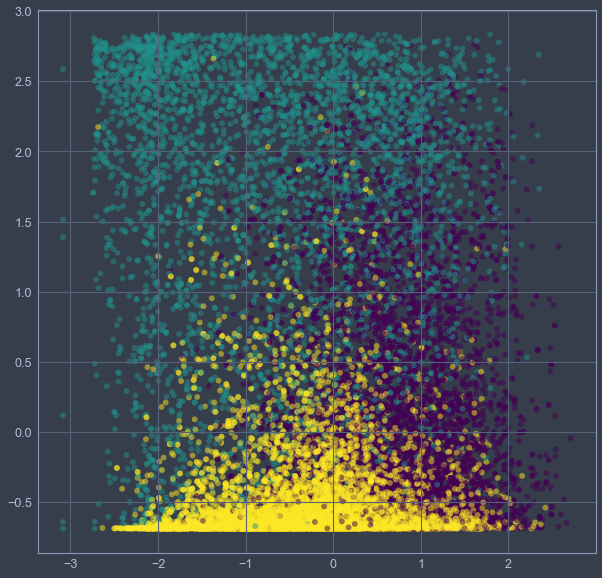

CPU times: total: 30.6 s
Wall time: 3.18 s


In [57]:
%%time
kmeans = KMeans(n_clusters=3,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1337)
kmeans.fit(X_feat_stan)
print(kmeans.inertia_)


clusters = kmeans.predict(X_feat_stan)

jtplot.style()
plt.figure(figsize=(10, 10))
plt.scatter(X_feat_stan[:, 0], X_feat_stan[:, 6], c=clusters,alpha=0.5)
plt.show()

In [ ]:
# finding optimal k # 
########################

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_feat_stan)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

jtplot.style()
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
kmeans.inertia_

In [ ]:
# metrics
############
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_feat_stan)
    silhouette.append(silhouette_score(X_feat_stan, kmeans.predict(X_feat_stan)))

jtplot.style()
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
#####################################
   # Clustering w/ MinMaxScaler #
####################################

In [84]:
%%time
kmeans = KMeans(n_clusters=3,
                init="random",
                n_init=500,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1337)
kmeans.fit(X_feat_minmax)
print(kmeans.inertia_)

10466.027306805052
CPU times: total: 2min 26s
Wall time: 12.8 s


In [94]:
clusters = kmeans.predict(X_feat_minmax)
clusters

array([1, 0, 0, ..., 2, 1, 1])

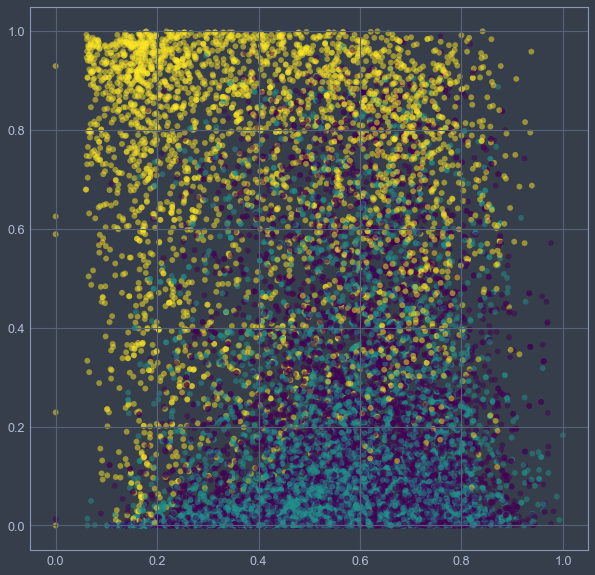

In [88]:
jtplot.style()
plt.figure(figsize=(10, 10))
plt.scatter(X_feat_minmax[:, 0], X_feat_minmax[:, 6], c=clusters,alpha=0.5)
plt.show()

In [ ]:
# finding optimal k #
########################
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_feat_minmax)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

jtplot.style()
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
# metrics #
##############
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_feat_minmax)
    silhouette.append(silhouette_score(X_feat_minmax, kmeans.predict(X_feat_minmax)))
    plt.figure(figsize=(16,8))

jtplot.style()
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
###################################
   # Agglomerative clustering #
###################################

In [ ]:
%%time
# StandardScaler #
#####################

# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_feat_stan)

jtplot.style()
plt.figure(figsize=(8, 8))
plt.scatter(X_feat_stan[:, 0], X_feat_stan[:, 6], c=pred,alpha=0.5)
plt.show()

In [ ]:
%%time
# MinMaxScaler #
#####################

# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_feat_minmax)

jtplot.style()
plt.figure(figsize=(10,10))
plt.scatter(X_feat_minmax[:, 0], X_feat_minmax[:, 6], c=pred,alpha=0.5)
plt.show()

# Recommender9000 <a class="anchor" id="round10"></a>

In [3]:
import spotipy
import json
import pandas as pd
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
import random
from random import randint
from time import sleep

# spotify login
secrets_file = open("spotify_dev.txt","r")
string = secrets_file.read()

secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip() # 0 = key, 1 = value, '=' = key-value-pair

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [4]:
# charts from 1st lab
topcharts= pd.read_csv('top.100.charts.csv')
topcharts.head(3)

,artist,title
0,John Rich,Progress
1,Kate Bush,Running Up That Hill (A Deal with God)
2,Lizzo,About Damn Time


In [ ]:
# playlist dataframe
data_1 = pd.read_csv('data_cluster.csv')
data_1.head(3)

In [ ]:
# song input
###############
# input_song = input('Name a song: ').lower() # user input is converted to lower case
# matches = [match for match in data_1 if input_song in match]
# if len(matches)>=1: # list length = 0 = no match in matches
#     print('{} is so hawt right now!'.format(matches[0].title())) # prints only the first match
#     print('Try another song: ' + random.choice(list_all.title).title())
# else:
#     print('No....just no...''\n''Nothing to recommend. Bye!')  # matches[0] -> without [0] this happens

In [ ]:
# art_name_1 = list(data_1[data_1.title.str.lower()==input_song]['artist'])[0]
# art_name_2 = list(data_1.artist[random.choice(data_1.title) == data_1.title])[0]

# for i in data_1['title'].str.lower():
    
# #     art_name_2 = list(data_1[data_1.title.str.lower()==data_1.artist]['artist'])[0]
#     if i == input_song: 
#         print('OMG ! ! ! <<<{} by {}>>> is so hawt right now ! ! ! <3 <3 <3'.format(input_song.title(),art_name_1),'\n'
#               'Also Try~ <<<{} by {}>>> /o/ |o| \o\ '.format(random.choice(data_1.title),art_name_2))
# #         break

In [ ]:
### 1st build

input_song = input('Name a song or "0" to quit: ').lower() # user input is converted to lower case

if input_song != '0':
    
    
#     for i in data_1['title'].str.lower():
#         i = str(i)
        
    all_tits = [i for i in data_1['title'].str.lower()]
    for i in all_tits:
        if i == input_song: 
            
            rando = random.choice(data_1.title)
        
            art_name_1 = list(data_1[data_1.title.str.lower()==input_song]['artist'])[0]
#             art_name_2 = list(data_1.artist[random.choice(data_1.title) == data_1.title])[0]
            art_name_2 = list(data_1.artist[rando == data_1.title])[0]
            
        
        
            print('OMG ! ! ! <<< {} by {} >>> is so hawt right now ! ! ! <3 <3 <3'.format(input_song.title(),art_name_1),'\n'
                  'Also Try~ <<< {} by {} >>> /o/ |o| \o\ '.format(rando,art_name_2))
            input_song = input('Name a song: ').lower()
#             break
        else:
            print('meow')
            break
            
else:
    if input_song =='0':
        print('done')
    
    else:
        print('muh')

In [ ]:
### 2nd build
# fetches complete or partial title

print('''The Ultimate Songe Recommender9000 \n\n''')
input_song = input('Name a song or "0" to quit: ').lower() # user input is converted to lower case

if input_song != '0':
    
    input_list = []
    for title in data_1.title.str.lower():
            title = str(title)
            if input_song in title:
                input_list.append(title)
           
    
    for i in data_1['title'].str.lower():
        
  
        if len(input_list) > 0:  
        
            input_list = input_list[0].lower()
        
            if input_song in input_list:          
                # gets the first match in the dataframe after converting it to a list        
                art_name_1 = list(data_1[data_1.title.str.lower()==input_list]['artist'])[0]
                # a random recommendation from the same list
                # matches the first title with the random choice
                rando = random.choice(data_1.title)
                art_name_2 = list(data_1.artist[rando == data_1.title])[0]
            
                print('OMG ! ! ! <<< {} by {} >>> is so hawt right now ! ! ! <3 <3 <3'.format(input_list.title(),art_name_1),'\n'
                  'Also Try~ <<< {} by {} >>> /o/ |o| \o\ '.format(rando,art_name_2),'\n\n')        
                break
            
        else:
            print('moomoo')
            break
            
            
            
else:
    if input_song =='0':
        print('done')
    
    else:
        print('muh')

In [167]:
### 3rd build
# fetches complete or partial title
# in this build is uses the the top 100 chart from the first lab
# when no title is found, it will search spotify for a match

print('''The Ultimate Song Recommender9000 \n\n''')
input_song = input('Name a song or "0" to quit: ').lower() # user input is converted to lower case

if input_song != '0':
    
    input_list = []
    for title in topcharts.title.str.lower():
#             title = str(title)
            if input_song in title:
                input_list.append(title)          

    for i in topcharts.title.str.lower():
        
        # if there is a match in top 100 charts:
        if len(input_list) > 0:  
        
            input_list = input_list[0].lower()
        
            if input_song in input_list:          
                # gets the first match in the dataframe before converting it to a list        
                art_name_1 = list(topcharts[topcharts.title.str.lower()==input_list]['artist'])[0]
                # a random recommendation from the same list
                # matches the first title from the random choice
                rando = random.choice(topcharts.title)
                art_name_2 = list(topcharts.artist[rando == topcharts.title])[0]
            
                print(f'<3 <3 <3 ! ! ! <<< {input_list.title()} by {art_name_1} >>> is so hawt right now ! ! ! <3 <3 <3'
                      '\n'
                      f'/o/ |o| Also Try~ <<< {rando} by {art_name_2} >>> |o| \o\ ''\n\n')    
                
#                 break
            
#         else:
#             print('Hm Hm...No hawt song anywhere to be found''\n'
#                   'Let me look somehwere else')
#             # spotify query + taking random element from it
#             results = sp.search(q=input_song, limit=50)
#             rando_2 = random.choice(results)
#             # fetching the uri from the random choice + getting audio features
#             # cleaning features + scaling
#             # predicting cluster + creating mini cluster dataframe
#             # merging mini frame with complete cluster dataframe
#             # selecting + printing random title and artist in same cluster
#             # ultimate profit
#             print('moomoo')
#             break
            
          
            
else:
    if input_song =='0':
        print('done')
    
    else:
        print('muh')

The Ultimate Song Recommender9000 


Name a song or "0" to quit: The Kind Of Love We Make by Luke Combs


In [9]:
### 4rd build
# fetches complete or partial title
# in this build is uses the the top 100 chart from the first lab
# when no title is found, it will search spotify for a match
# making final steps to recommend a song from the playlist

print('''
(¯`·¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯)
( \                                             / )
 ( ) The Ultimate Random Song Recommender9000™ ( ) 
  (/                                           \)  
   (.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.)    
\n\n''') # https://texteditor.com/ascii-art/

active = True
while active:
    input_song = input('Name a song or "0" to quit: ').lower() # user input is converted to lower case
    print('')
    if input_song =='0':
        active = False
        print('done')
    else:
         
        input_list = []
        for title in topcharts.title.str.lower():
#             title = str(title)
            if input_song in title:
                input_list.append(title)          

        for i in topcharts.title.str.lower():
        
        # if there is a match in top 100 charts:
            if len(input_list) > 0:  
        
                input_list = input_list[0].lower()
        
                if input_song in input_list:          
                # gets the first match in the dataframe before converting it to a list        
                    art_name_1 = list(topcharts[topcharts.title.str.lower()==input_list]['artist'])[0]
                    # a random recommendation from the same list
                    # matches the first title from the random choice
                    rando = random.choice(topcharts.title)
                    art_name_2 = list(topcharts.artist[rando == topcharts.title])[0]

                    print(f'\o\ ♬ ♩ ♫ /o\ {input_list.title()} BY {art_name_1} is so hawt right now /o\ ♬ ♩ ♫ /o/'
                          '\n'
                          f'/o/ ♪♪ |o| Also Try~ <<< {rando} BY {art_name_2} >>> |o| ♪♪ \o\ ''\n\n')
                          # https://textkool.com/en/symbols/musical-notes-music-symbols
    
#                     break
            
            else:

                print('Hm Hm...No hawt song anywhere to be found''\n'
                          'Let me look somehwere else''\n''\n')
            break
              
#             # spotify query + taking random element from it
#             results = sp.search(q=input_song, limit=50)
#             rando_2 = random.choice(results)
#             # fetching the uri from the random choice + getting audio features
#             # cleaning features + scaling
#             # predicting cluster + creating mini cluster dataframe
#             # merging mini frame with complete cluster dataframe
#             # selecting + printing random title and artist in same cluster
#             # ultimate profit



(¯`·¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯)
( \                                             / )
 ( ) The Ultimate Random Song Recommender9000™ ( ) 
  (/                                           \)  
   (.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.¸¸.·´¯`·.)    



Name a song or "0" to quit: love

\o\ ♬ ♩ ♫ /o\ The Kind Of Love We Make BY Luke Combs is so hawt right now /o\ ♬ ♩ ♫ /o/
/o/ ♪♪ |o| Also Try~ <<< Believer BY Imagine Dragons >>> |o| ♪♪ \o\ 


Name a song or "0" to quit: love

\o\ ♬ ♩ ♫ /o\ The Kind Of Love We Make BY Luke Combs is so hawt right now /o\ ♬ ♩ ♫ /o/
/o/ ♪♪ |o| Also Try~ <<< Son Of A Sinner BY Jelly Roll >>> |o| ♪♪ \o\ 


Name a song or "0" to quit: love

\o\ ♬ ♩ ♫ /o\ The Kind Of Love We Make BY Luke Combs is so hawt right now /o\ ♬ ♩ ♫ /o/
/o/ ♪♪ |o| Also Try~ <<< Big Energy (Remix) [feat. DJ Khaled] BY Latto & Mariah Carey >>> |o| ♪♪ \o\ 


Name a song or "0" to quit: love

\o\ ♬ ♩ ♫ /o\ The Kind Of Love We Make BY Luke Combs is so hawt right now /o\ ♬ ♩ ♫ /o/

In [198]:
input_song

'love'

In [ ]:

t = results['tracks']['items'][0]['name']


In [ ]:
pd.DataFrame(results['tracks']['items'])

In [ ]:
pd.DataFrame(results['tracks'].json())

In [ ]:
# working in else loop, when title is not in top 100 charts

In [61]:
### search for track name, artist name, uri and audio features
# sp.search(input_song, limit=10,type='track')['tracks']['items'][0]['name']
# sp.search(input_song, limit=10,type='track')['tracks']['items'][0]['artists'][0]['name']
sp.search(input_song, limit=10,type='track')['tracks']['items'][0]['uri']
sp.audio_features('1DMEzmAoQIikcL52psptQL')

[{'danceability': 0.646,
  'energy': 0.648,
  'key': 3,
  'loudness': -8.602,
  'mode': 1,
  'speechiness': 0.0372,
  'acousticness': 0.71,
  'instrumentalness': 0.00316,
  'liveness': 0.108,
  'valence': 0.466,
  'tempo': 75.004,
  'type': 'audio_features',
  'id': '1DMEzmAoQIikcL52psptQL',
  'uri': 'spotify:track:1DMEzmAoQIikcL52psptQL',
  'track_href': 'https://api.spotify.com/v1/tracks/1DMEzmAoQIikcL52psptQL',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1DMEzmAoQIikcL52psptQL',
  'duration_ms': 179423,
  'time_signature': 4}]

In [ ]:
title = [i['name'] for i in sp.search(input_song, limit=10,type='track')['tracks']['items']]

np.random.choice(title)

In [ ]:
random.choice(title)

In [ ]:
t_a = list(zip(title,artist))

In [ ]:
random.choice(t_a)

In [ ]:
artist = [i['artists'][0]['name'] for i in sp.search(input_song, limit=10,type='track')['tracks']['items']]

In [ ]:
artist

In [ ]:
# sp.search(input_song, limit=10,type='track')['tracks']['items']j['names']
for i,j,k in zip(sp.search(input_song, limit=10,type='track')['tracks']['items'],
               sp.search(input_song, limit=10,type='track')['tracks']['items'][0]['artists'],
               sp.search(input_song, limit=10,type='track')['tracks']['items']):
    print(f"{i['artists']} blub {j['name']} blob {k['name']}")

In [ ]:
for i,j in zip(sp.search(input_song, limit=10,type='track')['tracks']['items'],
               sp.search(input_song, limit=10,type='track')['tracks']['items'][0]['artists']):
    print(f"{i['artists']} blub {j['name']}")
               

In [ ]:
for i,j in enumerate(sp.search(input_song, limit=10,type='track')['tracks']['items']):
#     print(i)
    print(j['artists'][0]['name'])

In [ ]:
for i in sp.search(input_song, limit=10,type='track')['tracks']['items']:
    print(i['artists'][0]['name'])

In [ ]:
for j in sp.search(input_song, limit=10,type='track')['tracks']['items']:
    print(j['name'])

In [245]:
moo = []
lol = []
for i, j in zip(sp.search(input_song, limit=10,type='track')['tracks']['items'],
               sp.search(input_song, limit=10,type='track')['tracks']['items']):
    moo.append(i['artists'][0]['name'])
    lol.append(j['name'])

In [68]:
test =sp.audio_features('1DMEzmAoQIikcL52psptQL')
dftest = pd.DataFrame(test)

In [69]:
X_test = dftest.drop(['id','uri','track_href','analysis_url','type'],axis=1)
X_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.646,0.648,3,-8.602,1,0.0372,0.71,0.00316,0.108,0.466,75.004,179423,4


In [77]:
# X_feat_minmax = transformer.transform(X_feat)
X_test_norm =  transformer.transform(X_test)
X_test_norm 

array([[0.659857  , 0.648     , 0.27272727, 0.84669873, 1.        ,
        0.03919916, 0.71285141, 0.00316633, 0.10865191, 0.466     ,
        0.3382154 , 0.06653377, 0.8       ]])

In [83]:
pd.DataFrame(X_test_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.659857,0.648,0.272727,0.846699,1.0,0.039199,0.712851,0.003166,0.108652,0.466,0.338215,0.066534,0.8


In [118]:
kmeans.predict(X_test_norm)
cluster_test = pd.DataFrame(kmeans.predict(X_test_norm)).rename(columns={0:'cluster'})# = cluster 0
# cluster_test = cluster_test.rename(columns={0:'cluster'})
cluster_test

,cluster
0,0


In [95]:
# clusters = kmeans.predict(X_test_norm)
# jtplot.style()
# plt.figure(figsize=(10, 10))
# plt.scatter(X_test_norm[:, 0], X_test_norm[:, 6], c=clusters,alpha=0.5)
# plt.show()

In [130]:
cluster_map = pd.DataFrame()
cluster_map['titles'] = y.title
cluster_map['artist'] = y.artist
cluster_map['cluster'] = kmeans.labels_

In [131]:
cluster_map

,titles,artist,cluster
0,Need To Feel Loved - Cristoph Remix,Reflekt,1
1,She Is Really Fresh - Horisone Remix,Rafael Cerato,0
2,Rock It,Rafael Cerato,0
3,Too Late - Damon Jee Remix,Brigado Crew,0
4,Free You (feat. Stereo MC's) - Super Flu Remix,Moscoman,0
...,...,...,...
23033,Luxury,Jonatan Szer,2
23034,Sicco,African Drums,2
23035,Xilhamarisu,African Drums,2
23036,Liberte,Guem Et Zaka,1


In [141]:
test_rando_title = random.choice(pd.merge(cluster_map,cluster_test,how='inner')['titles'])

In [142]:
test_rando_title

'See the World'

In [150]:
artist_from_rando_title = list(cluster_map[cluster_map.titles==test_rando]['artist'])[0]

'Brett Dennen'

In [146]:
list(cluster_map.artist[rando == cluster_map.titles])

[]

In [152]:
cluster_map[cluster_map.titles=='See the World']

,titles,artist,cluster
11957,See the World,Brett Dennen,0
14257,See the World,Brett Dennen,0
